In [26]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator
import matplotlib.pyplot as plt
from nltk import corpus


In [2]:
url = "https://hundred.org/en/collections/hundred-2021"

response = requests.get(url)
headers = response.headers
body = response.text


In [3]:
soup = BeautifulSoup(body, "html.parser")
mainLink= "https://hundred.org/"
links = []
for link in soup.findAll('a', attrs={'href': re.compile("/en/innovations/")}):
        links.append(link.get('href'))

links= list(set(links))
print(links)
print(len(links))

['/en/innovations/teaching-tolerance', '/en/innovations/the-metis-fellowship', '/en/innovations/5-areas-of-development', '/en/innovations/lab4u-fcd26f47-a9b2-45db-ba29-d7b6f51e79c9', '/en/innovations/creating-together-by-kids-to-kids', '/en/innovations/dost-education', '/en/innovations/squawk-squad-global-change-environmental-education-platform', '/en/innovations/chatta', '/en/innovations/reap-benefit', '/en/innovations/educate-girls', '/en/innovations/inside-out-we-all-belong', '/en/innovations/scholas-occurrentes', '/en/innovations/cybersmart-africa', '/en/innovations/kide-science', '/en/innovations/hei-schools', '/en/innovations/profuturo-digital-education', '/en/innovations/be-strong-online', '/en/innovations/redes-de-tutoria', '/en/innovations/meetoo', '/en/innovations/minecraft-education-edition', '/en/innovations/fundacion-escuela-nueva', '/en/innovations/8-slam-out-loud', '/en/innovations/kids-education-revolution', '/en/innovations/xtalksworldlistens', '/en/innovations/0-speed

In [4]:
url = "https://hundred.org/en/collections/hundred-2022"

response = requests.get(url)
headers = response.headers
body = response.text


In [5]:
links2 = []
for link in soup.findAll('a', attrs={'href': re.compile("/en/innovations/")}):
        links2.append(link.get('href'))

links2= list(set(links2))
print(links2)
print(len(links2))

['/en/innovations/teaching-tolerance', '/en/innovations/the-metis-fellowship', '/en/innovations/5-areas-of-development', '/en/innovations/lab4u-fcd26f47-a9b2-45db-ba29-d7b6f51e79c9', '/en/innovations/creating-together-by-kids-to-kids', '/en/innovations/dost-education', '/en/innovations/squawk-squad-global-change-environmental-education-platform', '/en/innovations/chatta', '/en/innovations/reap-benefit', '/en/innovations/educate-girls', '/en/innovations/inside-out-we-all-belong', '/en/innovations/scholas-occurrentes', '/en/innovations/cybersmart-africa', '/en/innovations/kide-science', '/en/innovations/hei-schools', '/en/innovations/profuturo-digital-education', '/en/innovations/be-strong-online', '/en/innovations/redes-de-tutoria', '/en/innovations/meetoo', '/en/innovations/minecraft-education-edition', '/en/innovations/fundacion-escuela-nueva', '/en/innovations/8-slam-out-loud', '/en/innovations/kids-education-revolution', '/en/innovations/xtalksworldlistens', '/en/innovations/0-speed

In [6]:
links = links + links2
print(len(links))

200


In [7]:
print(links)

['/en/innovations/teaching-tolerance', '/en/innovations/the-metis-fellowship', '/en/innovations/5-areas-of-development', '/en/innovations/lab4u-fcd26f47-a9b2-45db-ba29-d7b6f51e79c9', '/en/innovations/creating-together-by-kids-to-kids', '/en/innovations/dost-education', '/en/innovations/squawk-squad-global-change-environmental-education-platform', '/en/innovations/chatta', '/en/innovations/reap-benefit', '/en/innovations/educate-girls', '/en/innovations/inside-out-we-all-belong', '/en/innovations/scholas-occurrentes', '/en/innovations/cybersmart-africa', '/en/innovations/kide-science', '/en/innovations/hei-schools', '/en/innovations/profuturo-digital-education', '/en/innovations/be-strong-online', '/en/innovations/redes-de-tutoria', '/en/innovations/meetoo', '/en/innovations/minecraft-education-edition', '/en/innovations/fundacion-escuela-nueva', '/en/innovations/8-slam-out-loud', '/en/innovations/kids-education-revolution', '/en/innovations/xtalksworldlistens', '/en/innovations/0-speed

In [11]:
websiteLinks = list()
for element in links:
        url = mainLink + element
        response = requests.get(url)
        if(response.status_code == 200):
                headers = response.headers
                body = response.text
                soup = BeautifulSoup(body, "html.parser")
                for link in soup.find_all('a', class_="contact-icon www"):
                        websiteLinks.append(link.get('href'))

print(websiteLinks)

['https://www.tolerance.org/', 'https://metiscollective.org/', 'https://academy.bt/', 'https://academy.bt/five-areas-of-development/', 'https://lab4u.co/en/home/', 'https://www.bykidstokids.net', 'https://www.dosteducation.com/', 'https://www.education.squawksquad.co.nz/', 'https://chattalearning.com/', 'https://reapbenefit.org/', 'https://www.educategirls.ngo/Home.aspx', 'https://unidirectory.auckland.ac.nz/profile/j-fenaughty', 'https://www.scholasoccurrentes.org/', 'https://cybersmartafrica.org/', 'https://kidescience.com', 'http://www.heischools.com/', 'https://profuturo.education/en/', 'https://bestrongonline.antibullyingpro.com/', 'https://www.meetoo.help', 'https://education.minecraft.net', 'https://escuelanueva.org', 'https://www.slamoutloud.com', 'https://linktr.ee/AlexBell', 'https://www.xtalksworldlistens.org', 'http://www.luminosfund.org', 'https://www.luminosfund.org', 'https://theclubhousenetwork.org/', 'https://www.kahoot.com', 'http://www.tcgcsys.com/', 'http://www.dfcw

In [17]:
text = ""
for link in websiteLinks:
   try:
      url = link
      response = requests.get(url)
      if(response.status_code == 200):
         headers = response.headers
         body = response.text
         soup = BeautifulSoup(body, "html.parser")
         text += soup.getText()
   except:
      print("Failed to connect to: " + link)
      continue


Failed to connect to: https://www.education.squawksquad.co.nz/
Failed to connect to: http://www.dfcworld.com/#
Failed to connect to: https://www.edcamp.org
Failed to connect to: https://www.aula42.org
Failed to connect to: https://www.education.squawksquad.co.nz/
Failed to connect to: http://www.dfcworld.com/#
Failed to connect to: https://www.coschool.co/
Failed to connect to: https://www.edcamp.org
Failed to connect to: https://www.aula42.org


Text Cleaning

In [30]:
stopWords = STOPWORDS
#stopWords.add(corpus.stopwords.words("english"))
wordCloud = WordCloud(stopwords=stopWords, width=800, height=400)
wordCloud.generate(text.lower())

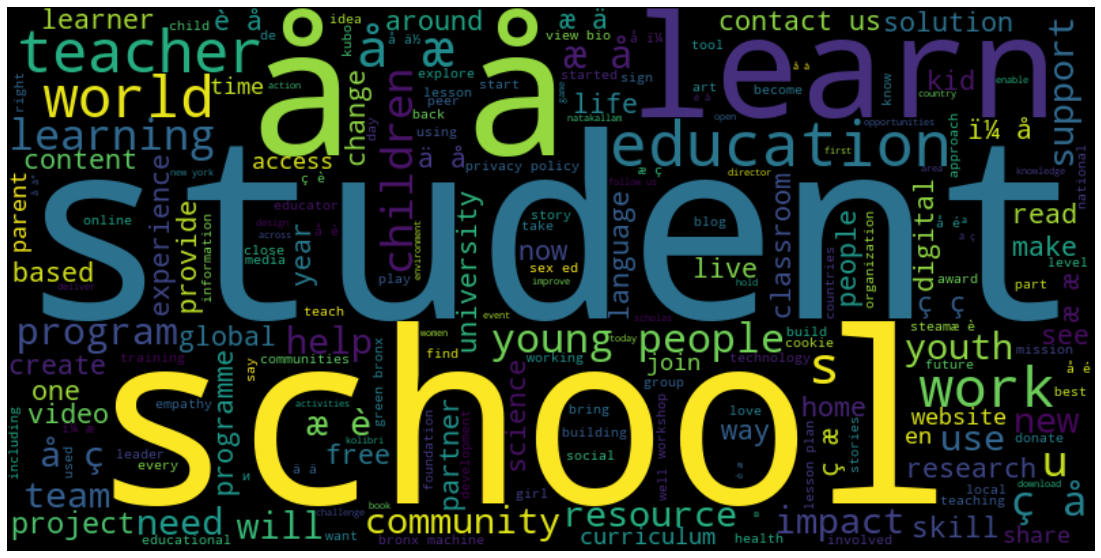

In [31]:
plt.figure(figsize=[20,10])
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [32]:
wordCloud.to_file("WordCloud.png")